In [1]:
import pickle
import numpy as np
import os

In [ ]:
IMAGE_PATH = os.path.join('../Outputs', 'Bathroom1_0_sensor_1.pkl')
print(f"Lade {IMAGE_PATH}")

Lade ../Outputs/Bathroom1_0_sensor_1.pkl


In [4]:
with open(IMAGE_PATH, 'rb') as f:
    data = pickle.load(f)
print(f"\nType des gelesene Objekts: {type(data)}")


Type des gelesene Objekts: <class 'dict'>


In [4]:
for key in data:
    print(f"\nKey: {key}")
    print(f"Type des Werts: {type(data[key][:200])}")


Key: ira_matrix
Type des Werts: <class 'list'>

Key: frame_index
Type des Werts: <class 'list'>

Key: GT_range
Type des Werts: <class 'list'>

Key: GT_depth
Type des Werts: <class 'list'>

Key: depth_raw_prediction
Type des Werts: <class 'list'>

Key: depth_KF_smoothed_prediction
Type des Werts: <class 'list'>

Key: depth_Size_based_predictioins
Type des Werts: <class 'list'>

Key: depth_KF_smoothed_Size_based_predictioins
Type des Werts: <class 'list'>

Key: range_raw_prediction
Type des Werts: <class 'list'>

Key: range_KF_smoothed_prediction
Type des Werts: <class 'list'>

Key: range2_raw_prediction
Type des Werts: <class 'list'>

Key: range2_KF_smoothed_prediction
Type des Werts: <class 'list'>

Key: TruePositive
Type des Werts: <class 'list'>

Key: FalsePositive
Type des Werts: <class 'list'>

Key: FalseNegtive
Type des Werts: <class 'list'>


In [5]:
print(data.keys())

dict_keys(['ira_matrix', 'frame_index', 'GT_range', 'GT_depth', 'depth_raw_prediction', 'depth_KF_smoothed_prediction', 'depth_Size_based_predictioins', 'depth_KF_smoothed_Size_based_predictioins', 'range_raw_prediction', 'range_KF_smoothed_prediction', 'range2_raw_prediction', 'range2_KF_smoothed_prediction', 'TruePositive', 'FalsePositive', 'FalseNegtive'])


In [6]:
if 'ira_matrix' in data:
    ira_matrix = np.array(data['ira_matrix'])
    print("ira_matrix shape:", ira_matrix.shape)
    # print("ira_matrix Beispielwerte:\n", ira_matrix[:5])

ira_matrix shape: (618, 24, 32)


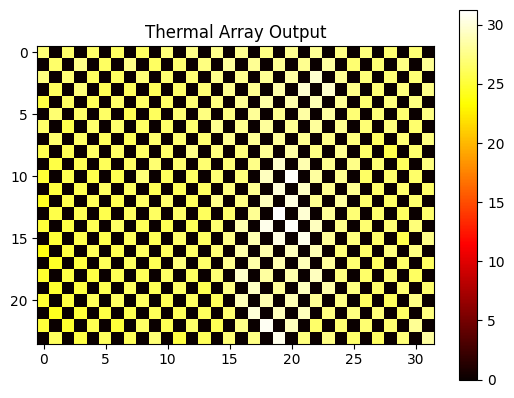

In [7]:
import matplotlib.pyplot as plt

plt.imshow(ira_matrix[0], cmap='hot')
plt.colorbar()
plt.title("Thermal Array Output")
plt.show()

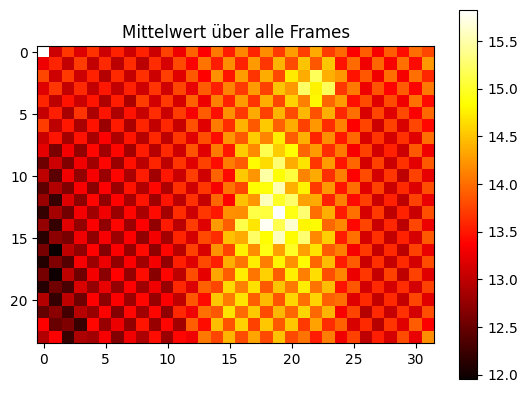

In [8]:
import matplotlib.pyplot as plt

# Zeige einen Querschnitt durch die Zeitachse (z.B. Mittelwert über alle Frames)
mean_image = ira_matrix.mean(axis=0)
plt.imshow(mean_image, cmap='hot')
plt.colorbar()
plt.title("Mittelwert über alle Frames")
plt.show()

In [57]:
#import ipyvolume as ipv
#ipv.quickvolshow(ira_matrix, level=0.1)

GT_range shape: (464,)


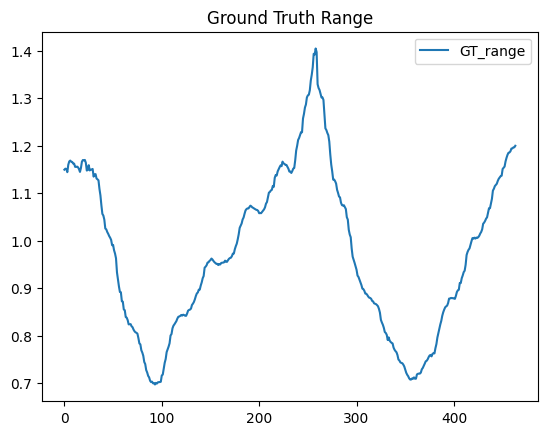

GT_depth shape: (464,)


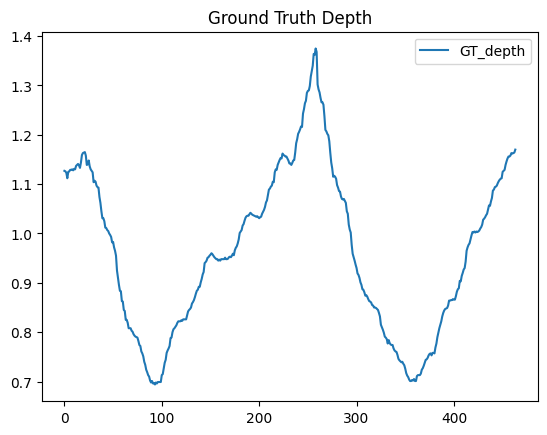

Prediction shape: (464,)


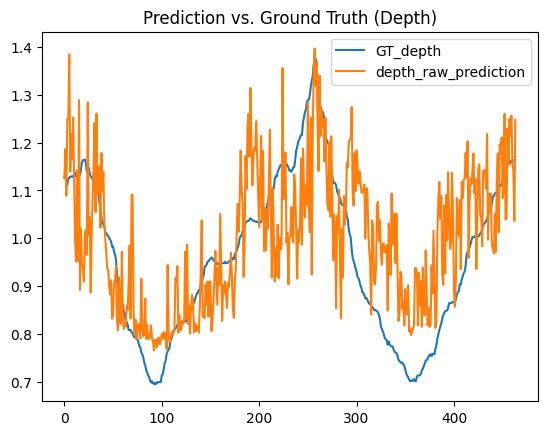

In [9]:
import matplotlib.pyplot as plt

# Ground Truth Range
if "GT_range" in data:
    gt_range = np.array(data["GT_range"])
    print("GT_range shape:", gt_range.shape)
    plt.plot(gt_range, label="GT_range")
    plt.title("Ground Truth Range")
    plt.legend()
    plt.show()

# Ground Truth Depth
if "GT_depth" in data:
    gt_depth = np.array(data["GT_depth"])
    print("GT_depth shape:", gt_depth.shape)
    plt.plot(gt_depth, label="GT_depth")
    plt.title("Ground Truth Depth")
    plt.legend()
    plt.show()

# Prediction vs. Ground Truth
if "depth_raw_prediction" in data and "GT_depth" in data:
    pred = np.array(data["depth_raw_prediction"])
    gt = np.array(data["GT_depth"])
    print("Prediction shape:", pred.shape)
    plt.plot(gt, label="GT_depth")
    plt.plot(pred, label="depth_raw_prediction")
    plt.title("Prediction vs. Ground Truth (Depth)")
    plt.legend()
    plt.show()

In [11]:
# Anzahl erkannter Personen pro Frame
if "TruePositive" in data:
    true_pos = np.array(data["TruePositive"])
    print("TruePositive shape:", true_pos.shape)
    # print("Erkannte Personen pro Frame:", true_pos)

# Entfernung (Range) pro Frame
if "GT_range" in data:
    gt_range = np.array(data["GT_range"])
    # print("Entfernung (GT_range) pro Frame:", gt_range)
    print("Entfernung Shape:", gt_range.shape)

# Modellvorhersage Entfernung
if "range_raw_prediction" in data:
    pred_range = np.array(data["range_raw_prediction"])
    print("Predicted Range shape:", pred_range.shape)
    # print("Vorhergesagte Entfernung pro Frame:", pred_range)

TruePositive shape: (618,)
Entfernung Shape: (464,)
Predicted Range shape: (464,)


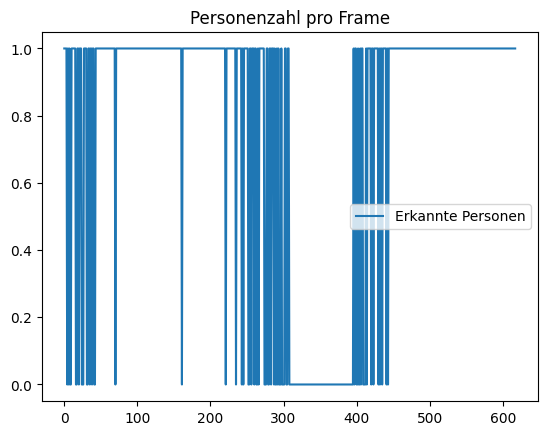

In [12]:
import matplotlib.pyplot as plt

if "TruePositive" in data:
    plt.plot(data["TruePositive"], label="Erkannte Personen")
    plt.title("Personenzahl pro Frame")
    plt.legend()
    plt.show()

Lade Daten aus: ../Outputs/Bathroom1_0_sensor_1.pkl...

--- Entfernungsanalyse (Range) ---
  RMSE (Raw Prediction): 0.13 m
  RMSE (Kalman Smoothed): 0.11 m

--- Erkennungsmetriken (Detection) ---
  True Positives (TP): 464
  False Positives (FP): 157
  False Negatives (FN): 242
  Precision (Präzision): 0.7472
  Recall (Sensitivität): 0.6572
  F1 Score: 0.6993


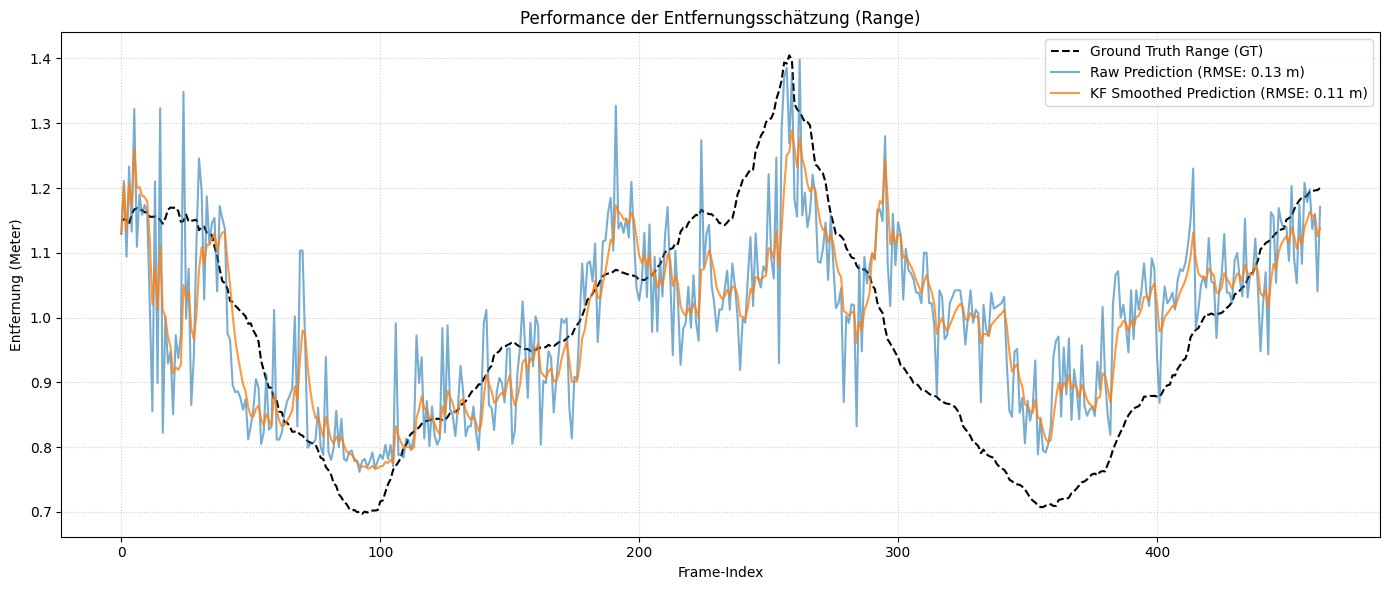

In [13]:
def load_data(file_path):
    """Lädt die Daten aus der Pickle-Datei."""
    print(f"Lade Daten aus: {file_path}...")
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        return data
    except FileNotFoundError:
        print(f"FEHLER: Datei nicht gefunden unter {file_path}")
        return None
    except Exception as e:
        print(f"FEHLER beim Laden der Pickle-Datei: {e}")
        return None
    
    
def analyze_and_plot_performance(data):
    """Analysiert und visualisiert die Performancedaten."""
    
    # --- A. Entfernungsvergleich (Ground Truth vs. Vorhersage) ---
    if 'GT_range' in data and 'range_raw_prediction' in data and 'range_KF_smoothed_prediction' in data:
        
        gt_range = np.array(data['GT_range']).flatten()
        raw_pred = np.array(data['range_raw_prediction']).flatten()
        kf_pred = np.array(data['range_KF_smoothed_prediction']).flatten()
        
        # Finde die kürzeste Länge, um sicherzustellen, dass Arrays übereinstimmen
        min_len = min(len(gt_range), len(raw_pred), len(kf_pred))
        gt_range = gt_range[:min_len]
        raw_pred = raw_pred[:min_len]
        kf_pred = kf_pred[:min_len]
        
        # Berechne den Fehler (RMSE)
        raw_error = np.sqrt(np.mean((gt_range - raw_pred)**2))
        kf_error = np.sqrt(np.mean((gt_range - kf_pred)**2))
        
        print(f"\n--- Entfernungsanalyse (Range) ---")
        print(f"  RMSE (Raw Prediction): {raw_error:.2f} m")
        print(f"  RMSE (Kalman Smoothed): {kf_error:.2f} m")

        # Visualisierung
        plt.figure(figsize=(14, 6))
        plt.plot(gt_range, label='Ground Truth Range (GT)', color='black', linestyle='--')
        plt.plot(raw_pred, label=f'Raw Prediction (RMSE: {raw_error:.2f} m)', alpha=0.6)
        plt.plot(kf_pred, label=f'KF Smoothed Prediction (RMSE: {kf_error:.2f} m)', alpha=0.8)
        
        plt.title('Performance der Entfernungsschätzung (Range)')
        plt.xlabel('Frame-Index')
        plt.ylabel('Entfernung (Meter)')
        plt.legend()
        plt.grid(True, linestyle=':', alpha=0.6)
        
    else:
        print("\nWarnung: Die Schlüssel 'GT_range', 'range_raw_prediction' oder 'range_KF_smoothed_prediction' fehlen.")
        
    # --- B. Metriken zur Erkennungsleistung (Detection) ---
    tp = data.get('TruePositive', [])
    fp = data.get('FalsePositive', [])
    fn = data.get('FalseNegtive', [])
    
    if len(tp) > 0 and len(fp) > 0 and len(fn) > 0:
        
        tp = np.sum(tp) # Summiere über Frames
        fp = np.sum(fp)
        fn = np.sum(fn)
        
        # Berechne Precision und Recall
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        print(f"\n--- Erkennungsmetriken (Detection) ---")
        print(f"  True Positives (TP): {tp}")
        print(f"  False Positives (FP): {fp}")
        print(f"  False Negatives (FN): {fn}")
        print(f"  Precision (Präzision): {precision:.4f}")
        print(f"  Recall (Sensitivität): {recall:.4f}")
        print(f"  F1 Score: {f1_score:.4f}")
        
    else:
        print("\nWarnung: Die Schlüssel für TP, FP oder FN fehlen. Keine Metriken berechnet.")

    plt.tight_layout()
    plt.show()

# --- Hauptausführung ---
if __name__ == "__main__":
    data = load_data(IMAGE_PATH)
    if data:
        analyze_and_plot_performance(data)
